In [3]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import cv2
import seaborn as sns; sns.set()
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

In [ ]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [5]:
#Obtenemos el dataframe con las imagenes

In [6]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

In [7]:
#Se crean 2 funciones con el fin de imprimir 1 y 5 imagenes ymostramos el ejemplo

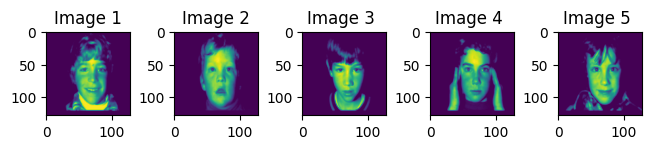

In [8]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_5_images(data,ix_1, ix_2 , ix_3, ix_4, ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()
plot_5_images(X,1, 2 , 3, 4, 5)

### Paso 1, Quitamos la media de los datos.

In [9]:
#Hallamos la mean face

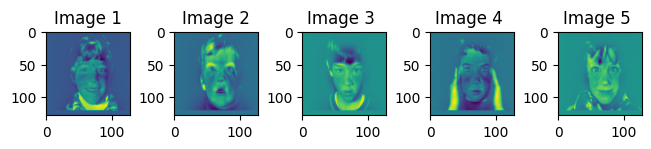

In [11]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_5_images(X_center,1, 2 ,3 ,4 ,5)

In [12]:
#mostramos la mean face mediante la funcion plot_1_images

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

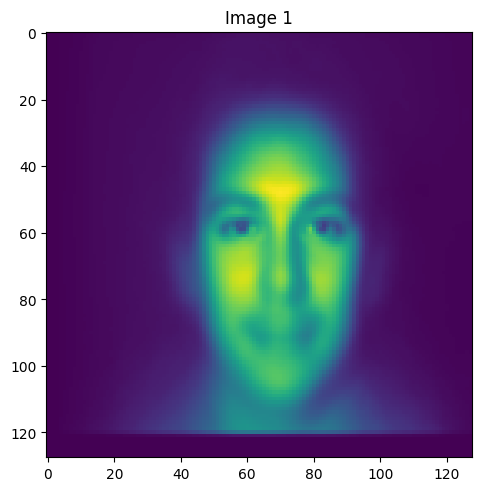

In [13]:
plot_1_images(X_mean)

## Paso 2, Calcular Matrix de Covarianza
Calculamos los eigenvalues y eigen vectors

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)
X_reduced

array([[-1.79783640e+02, -6.83666822e+01, -1.08416863e+03, ...,
         5.10754695e+01,  7.24499440e+01,  7.12110464e+01],
       [ 2.75167695e+03, -1.23245777e+03,  2.07371195e+03, ...,
         2.37463920e+00, -1.24730562e+01, -7.74806139e+01],
       [ 1.59334516e+03, -7.47592904e+02, -1.33946480e+03, ...,
         3.48440744e+01, -9.60253809e+00,  1.95132404e+01],
       ...,
       [-3.69347405e+03,  5.98861867e+01,  9.78060193e+01, ...,
         2.99326252e+01,  4.54418974e+01, -1.06690034e+01],
       [-4.15009412e+02,  1.26001300e+03,  1.79292000e+03, ...,
        -5.61258328e+01, -4.72271586e+01,  1.31409462e+01],
       [-1.59897806e+03, -4.32304427e+02,  1.37194758e+03, ...,
        -2.48802501e+01,  4.91506550e+01,  8.32002353e+01]])

In [15]:
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)
X_reduced

array([[ -179.78364011,   -68.36668217, -1084.16863375, ...,
          212.42038142,    43.43360331,   -23.53468576],
       [ 2751.67695471, -1232.45777192,  2073.71195425, ...,
         -161.88438091,    54.78255456,    -4.63890751],
       [ 1593.34516392,  -747.59290427, -1339.46479799, ...,
           29.70544768,    33.55381892,   -37.6866829 ],
       ...,
       [-3693.47404846,    59.88618674,    97.80601926, ...,
          -14.55882877,    48.77296443,    53.88837587],
       [ -415.0094116 ,  1260.0130037 ,  1792.92000498, ...,
          -39.03115193,   -60.24438391,    58.63723414],
       [-1598.97805759,  -432.30442704,  1371.94757556, ...,
            8.92253222,   -55.95012663,    51.59672553]])

In [16]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

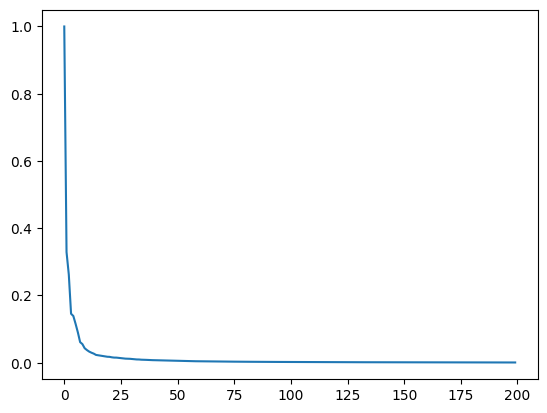

In [17]:
# Se puede ver como los primeras componentes contienen mas informacion
plt.plot(range(0,200), eigen_values/eigen_values[0])

### Paso 4 Reconstruir la imagen 

In [18]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (801, 200)
Eigenvectores (200, 16384)
[-1.00382596e-11  2.35636817e-11  1.52199987e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [19]:
#Con las eigen faces ya podemos reconstruir las imagenes

In [20]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

In [21]:
#Definimos una funcion que nos ayudara a encontrar la cantidad de componentes necesarios para un porcentaje dado

In [22]:
def encontrarCantidadComponentes(porcentaje_dado, eigen_faces):
    varianza_total = np.sum(eigen_values)
    porcentaje=0
    eigen_faces_encontradas=0
    for i in range(len(eigen_values)):
        porcentaje = porcentaje + eigen_values[i]/varianza_total
        if porcentaje >= porcentaje_dado:
            return i;

In [23]:
encontrarCantidadComponentes(0.9, eigen_values)

45

In [24]:
encontrarCantidadComponentes(0.99, eigen_values)

160

###Continuamos Reconstruyendo las primeras 5 caras

(None, <Axes: title={'center': 'Con 99% Componentes'}>)

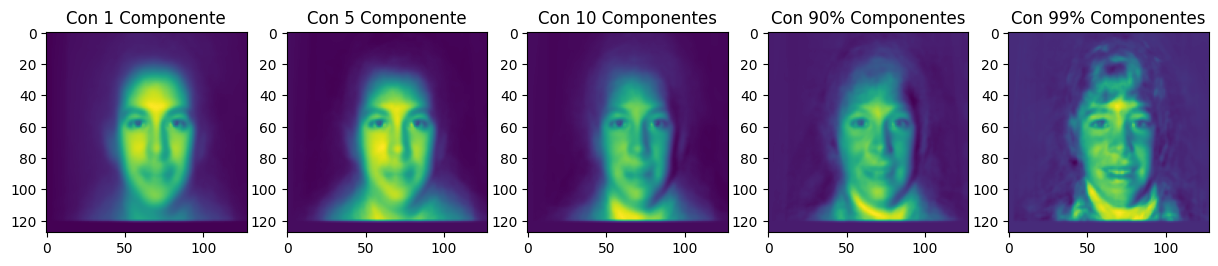

In [25]:

face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_50 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_100 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:45],
                                     eigen_faces[:45,:]),
                              axis=0)

face_300 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:161],
                                     eigen_faces[:161,:]),
                              axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_10,ax=ax[0],label="Con 1 Componente")
plot_1_images(face_50,ax=ax[1],label="Con 5 Componente")
plot_1_images(face_100,ax=ax[2],label="Con 10 Componentes")
plot_1_images(face_200,ax=ax[3],label="Con 90% Componentes")
plot_1_images(face_300,ax=ax[4],label="Con 99% Componentes")

(None, <Axes: title={'center': 'Con 99% Componentes'}>)

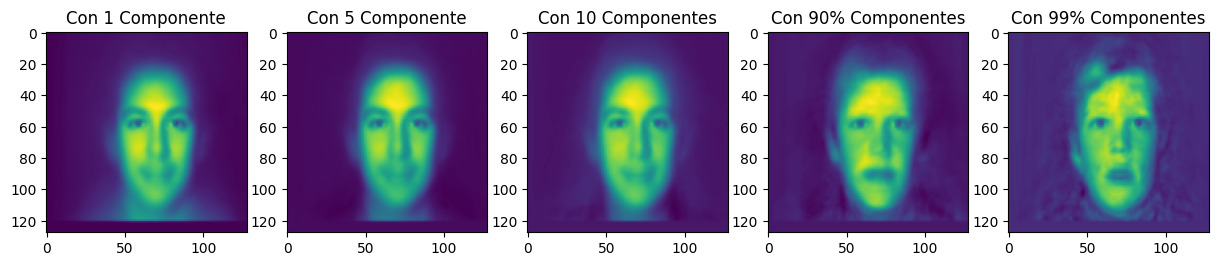

In [26]:
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_50 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_100 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:45],
                                     eigen_faces[:45,:]),
                              axis=0)

face_300 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:161],
                                     eigen_faces[:161,:]),
                              axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_10,ax=ax[0],label="Con 1 Componente")
plot_1_images(face_50,ax=ax[1],label="Con 5 Componente")
plot_1_images(face_100,ax=ax[2],label="Con 10 Componentes")
plot_1_images(face_200,ax=ax[3],label="Con 90% Componentes")
plot_1_images(face_300,ax=ax[4],label="Con 99% Componentes")

(None, <Axes: title={'center': 'Con 99% Componentes'}>)

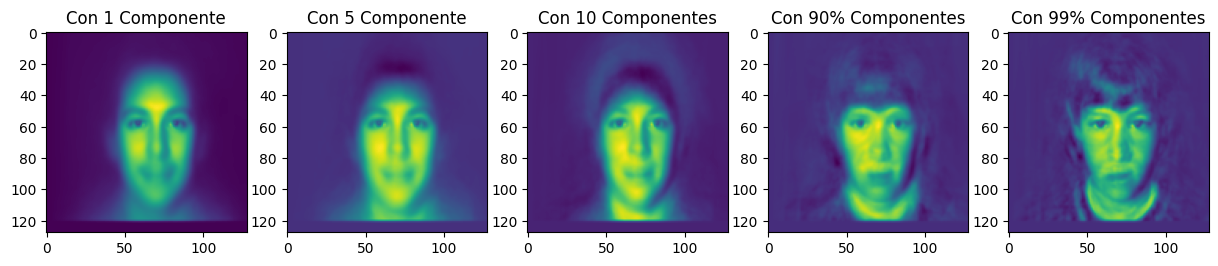

In [27]:
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_50 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_100 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:45],
                                     eigen_faces[:45,:]),
                              axis=0)

face_300 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:161],
                                     eigen_faces[:161,:]),
                              axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_10,ax=ax[0],label="Con 1 Componente")
plot_1_images(face_50,ax=ax[1],label="Con 5 Componente")
plot_1_images(face_100,ax=ax[2],label="Con 10 Componentes")
plot_1_images(face_200,ax=ax[3],label="Con 90% Componentes")
plot_1_images(face_300,ax=ax[4],label="Con 99% Componentes")

(None, <Axes: title={'center': 'Con 99% Componentes'}>)

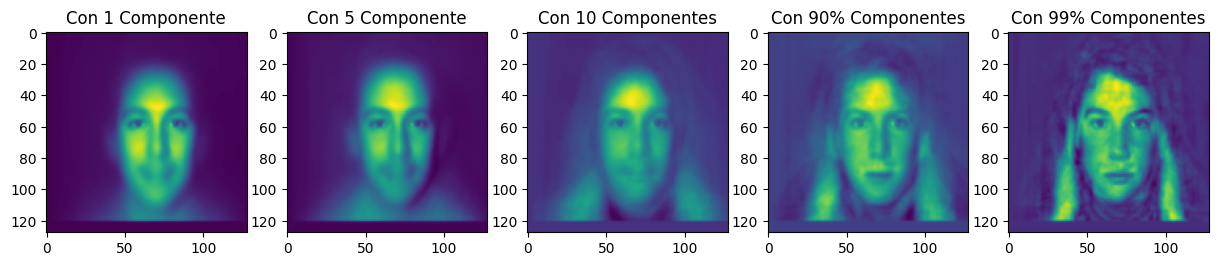

In [28]:
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_50 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_100 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:45],
                                     eigen_faces[:45,:]),
                              axis=0)

face_300 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:161],
                                     eigen_faces[:161,:]),
                              axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_10,ax=ax[0],label="Con 1 Componente")
plot_1_images(face_50,ax=ax[1],label="Con 5 Componente")
plot_1_images(face_100,ax=ax[2],label="Con 10 Componentes")
plot_1_images(face_200,ax=ax[3],label="Con 90% Componentes")
plot_1_images(face_300,ax=ax[4],label="Con 99% Componentes")

(None, <Axes: title={'center': 'Con 99% Componentes'}>)

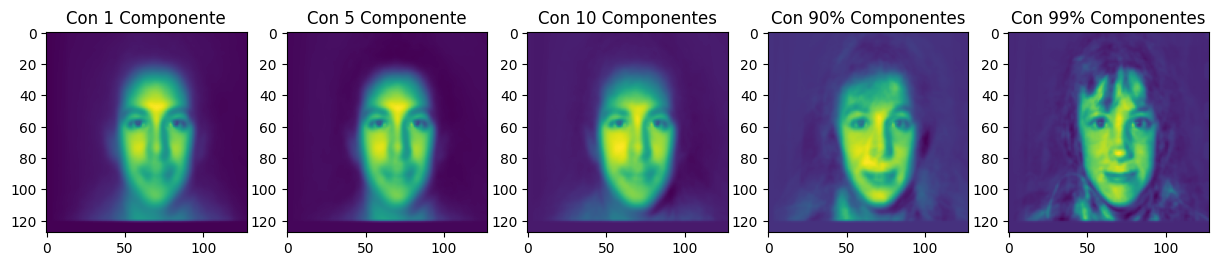

In [29]:
face_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_50 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_100 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:45],
                                     eigen_faces[:45,:]),
                              axis=0)

face_300 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:161],
                                     eigen_faces[:161,:]),
                              axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_10,ax=ax[0],label="Con 1 Componente")
plot_1_images(face_50,ax=ax[1],label="Con 5 Componente")
plot_1_images(face_100,ax=ax[2],label="Con 10 Componentes")
plot_1_images(face_200,ax=ax[3],label="Con 90% Componentes")
plot_1_images(face_300,ax=ax[4],label="Con 99% Componentes")

In [30]:
#Aqui comienza el punto 2

In [31]:
#Se usa la formula dada en el notebook de clase sobre el Kmeans

In [32]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        # Using Distance formula -2X*MU  + X^2 + MU^2
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

In [33]:
#Tambien se aplica la clase de reduccion de componentes

In [34]:
def reduce_dim_pca(components, X_train, X_test):
    """
    This method reduce the dimensionality of the Train and Test Matrix.
    """
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    text = 'Explained variation per principal component: {}'
    print(text.format(np.sum(pca.explained_variance_ratio_[:components])))
    return X_r, X_nr

In [35]:
#Utilizamos el X para realizar el Kmeans

In [36]:
X_r, X_nr = reduce_dim_pca(3, X, X)

Explained variation per principal component: 0.5047014679076389


In [37]:
#Se aplica el Kmeans sobre los datos dados

In [38]:
k = 5
kmeans = Kmeans(k)
kmeans.train(X_r)
labels = kmeans.predict(X_r)
s_y_train_cluster = labels[:,0]

In [39]:
#Se grafica el Kmeans realizado

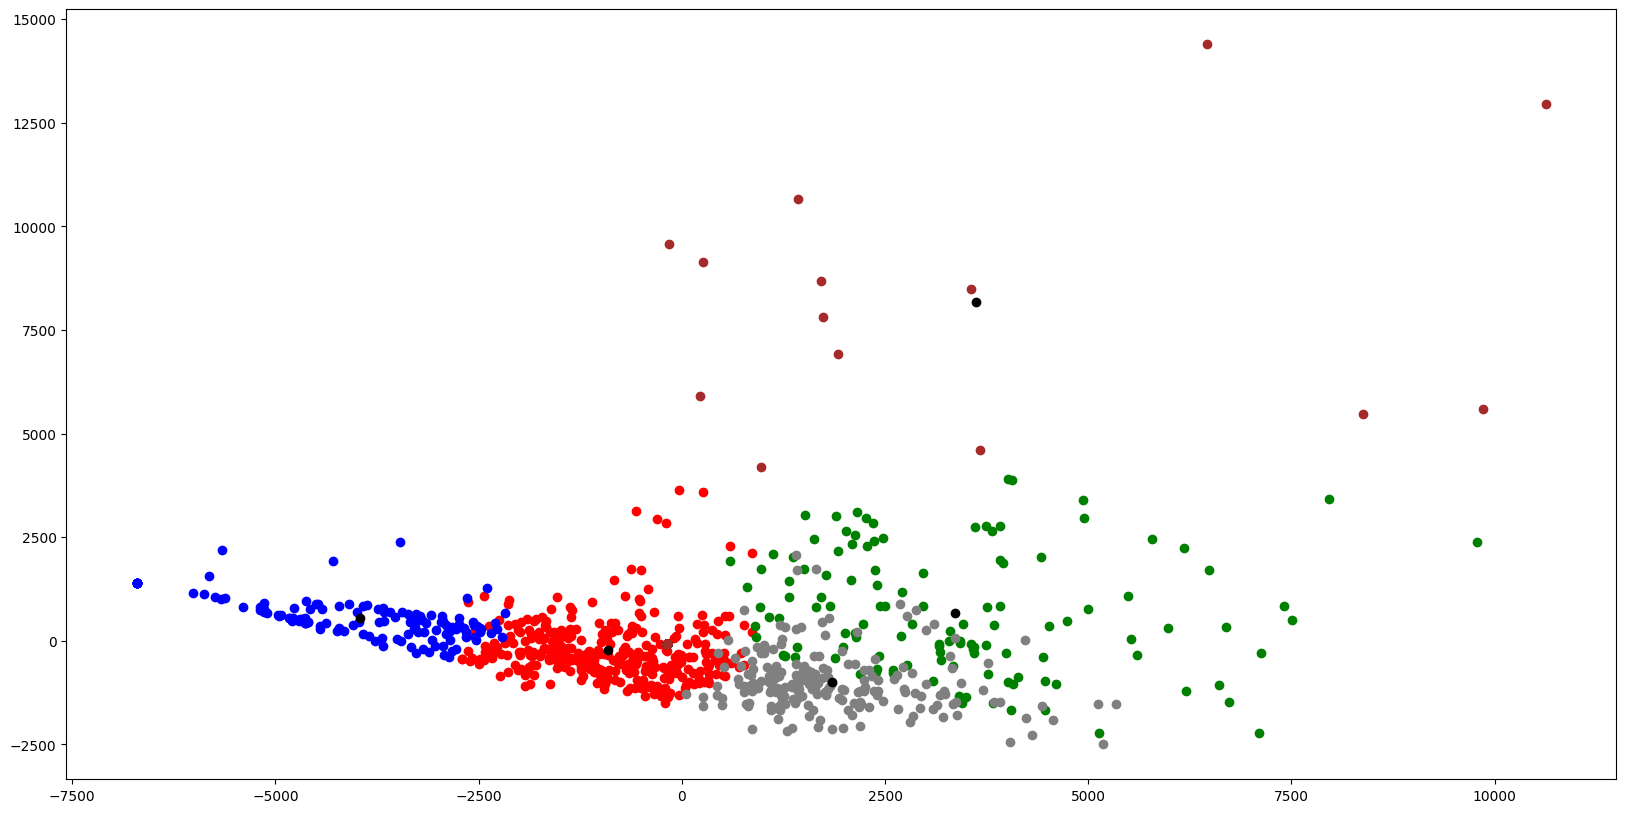

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_r[np.where(labels==0),0],X_r[np.where(labels==0),1],c='r')
ax.scatter(X_r[np.where(labels==1),0],X_r[np.where(labels==1),1],c='b')
ax.scatter(X_r[np.where(labels==2),0],X_r[np.where(labels==2),1],c='g')
ax.scatter(X_r[np.where(labels==3),0],X_r[np.where(labels==3),1],c='gray')
ax.scatter(X_r[np.where(labels==4),0],X_r[np.where(labels==4),1],c='brown')
ax.scatter(kmeans.mu[:,0],
           kmeans.mu[:,1], c='black')

In [41]:
#Definimos una funcion para siempre escoger las 3 primeras caras mas cercanas al centroide calculado

In [42]:
def tres_primeras_caras(lista):
    numero_f = [0,1,2]
    for i in range(0,3):
        num = lista[i]
        numero_f[i] = str(num[0])
    return numero_f

In [43]:
print(kmeans.mu[:5])

[[ -903.70571459  -223.10803224   178.07263879]
 [-3956.61073702   549.27277148  -448.29818741]
 [ 3358.74622546   673.96722418 -1216.55384967]
 [ 1847.34665439  -982.01384338   597.05808385]
 [ 3619.98322951  8171.2874738   2182.33123745]]


In [44]:
#Se aplica en cada uno de los centroides realizados

In [45]:
sc_1 = sorted(list(enumerate(X_r)), key = lambda x: np.linalg.norm(x[1]-kmeans.mu[0]))

In [46]:
sc_2 = sorted(list(enumerate(X_r)), key = lambda x: np.linalg.norm(x[1]-kmeans.mu[1]))

In [47]:
sc_3 = sorted(list(enumerate(X_r)), key = lambda x: np.linalg.norm(x[1]-kmeans.mu[2]))

In [48]:
sc_4 = sorted(list(enumerate(X_r)), key = lambda x: np.linalg.norm(x[1]-kmeans.mu[3]))

In [49]:
sc_5 = sorted(list(enumerate(X_r)), key = lambda x: np.linalg.norm(x[1]-kmeans.mu[4]))

In [50]:
pt1 = tres_primeras_caras(sc_1)
pt2 = tres_primeras_caras(sc_2)
pt3 = tres_primeras_caras(sc_3)
pt4 = tres_primeras_caras(sc_4)
pt5 = tres_primeras_caras(sc_5)

In [51]:
#Por ultimo se imprimen las imagenes obtenidas

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Imagen 3'}>)

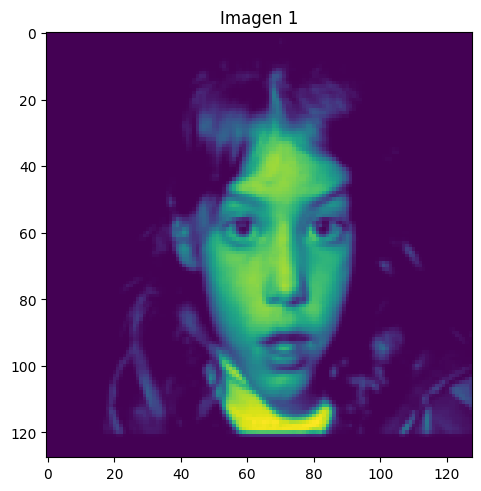

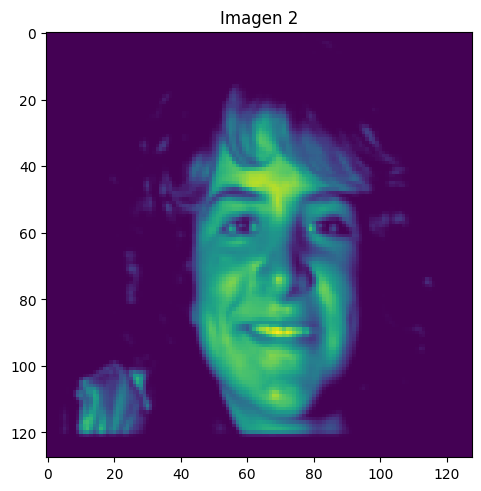

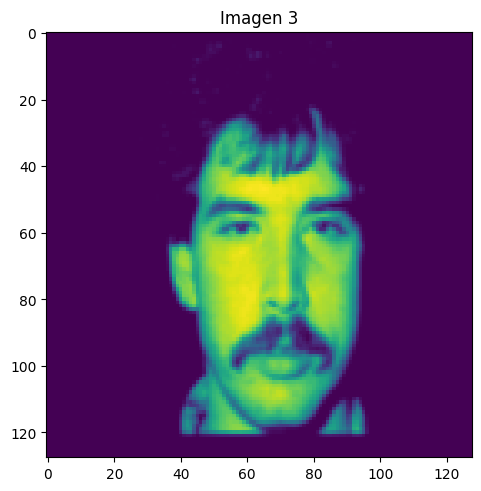

In [52]:
plot_1_images(X[int(pt1[0])], "Imagen 1")
plot_1_images(X[int(pt1[1])], "Imagen 2")
plot_1_images(X[int(pt1[2])], "Imagen 3")

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Imagen 3'}>)

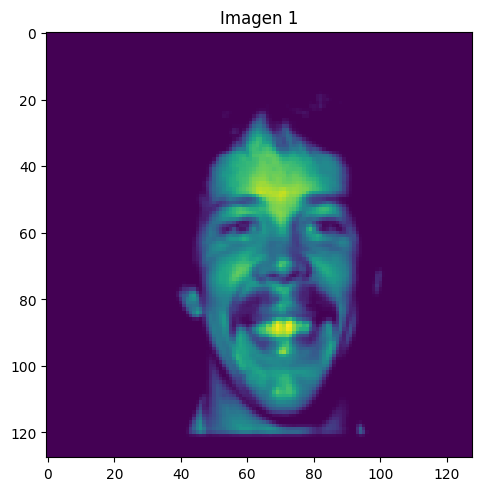

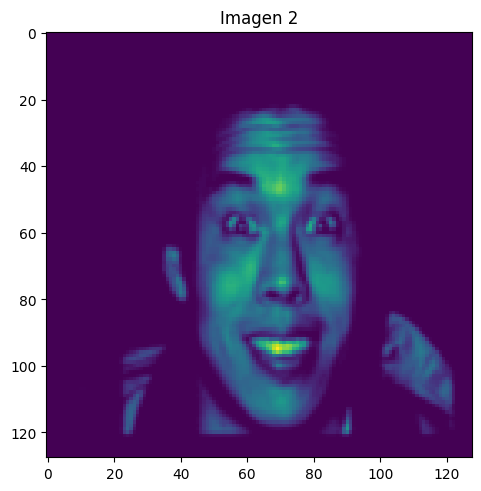

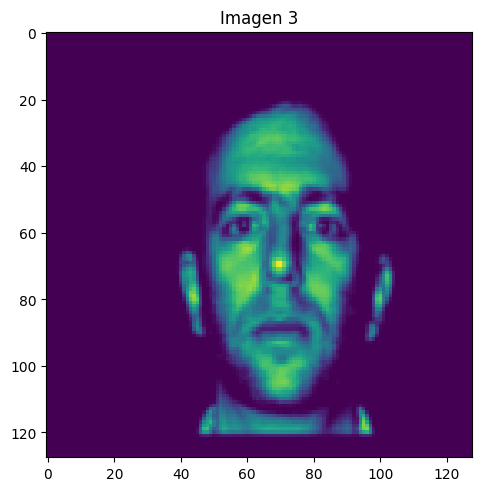

In [53]:
plot_1_images(X[int(pt2[0])], "Imagen 1")
plot_1_images(X[int(pt2[1])], "Imagen 2")
plot_1_images(X[int(pt2[2])], "Imagen 3")

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Imagen 3'}>)

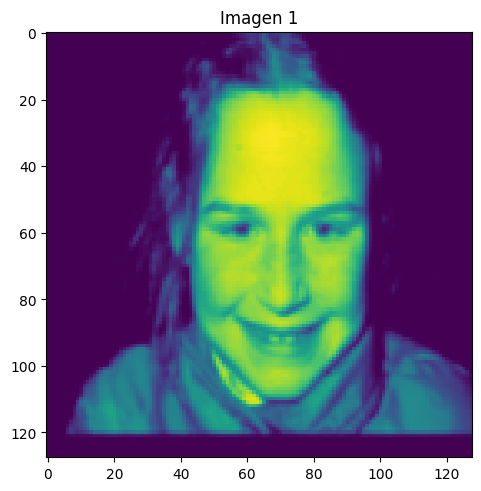

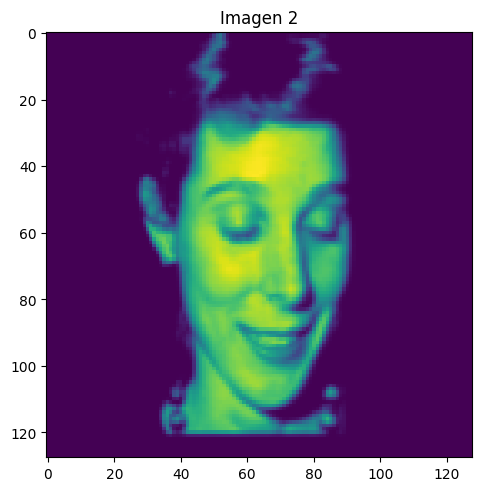

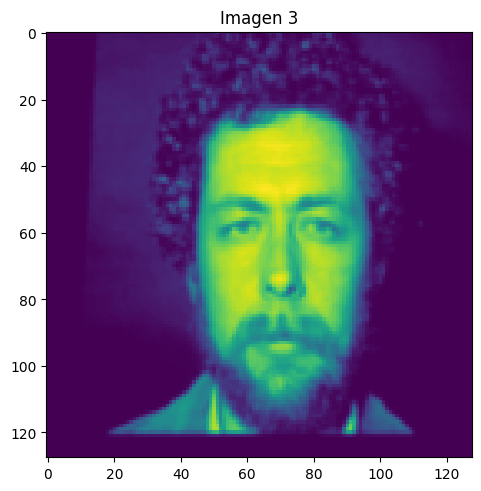

In [54]:
plot_1_images(X[int(pt3[0])], "Imagen 1")
plot_1_images(X[int(pt3[1])], "Imagen 2")
plot_1_images(X[int(pt3[2])], "Imagen 3")

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Imagen 3'}>)

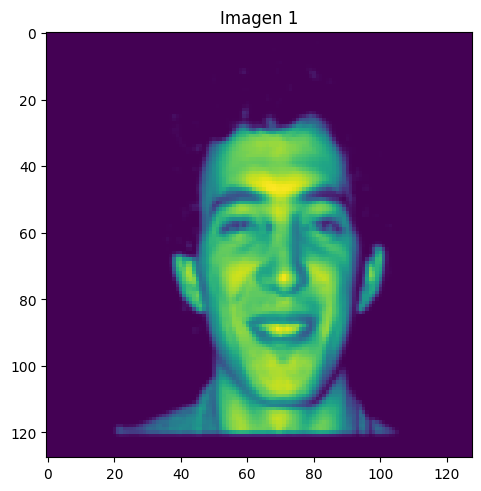

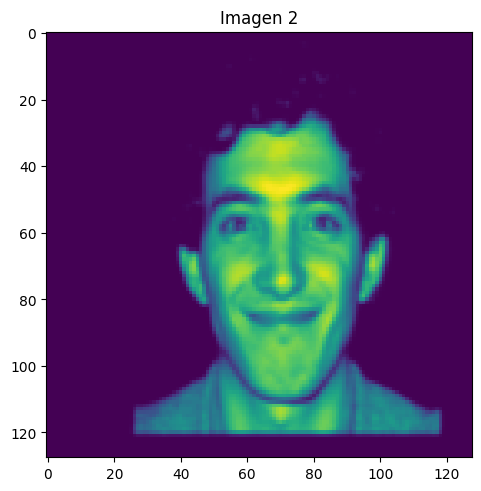

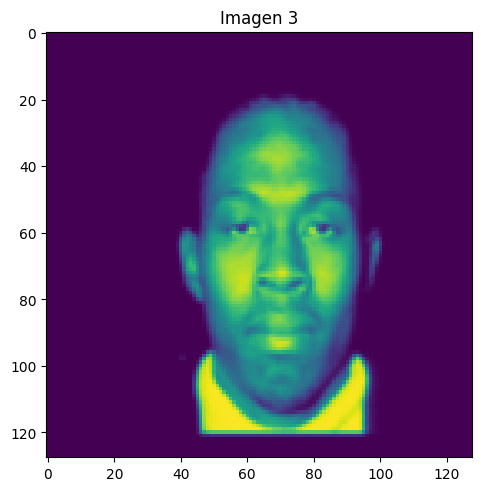

In [55]:
plot_1_images(X[int(pt4[0])], "Imagen 1")
plot_1_images(X[int(pt4[1])], "Imagen 2")
plot_1_images(X[int(pt4[2])], "Imagen 3")

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Imagen 3'}>)

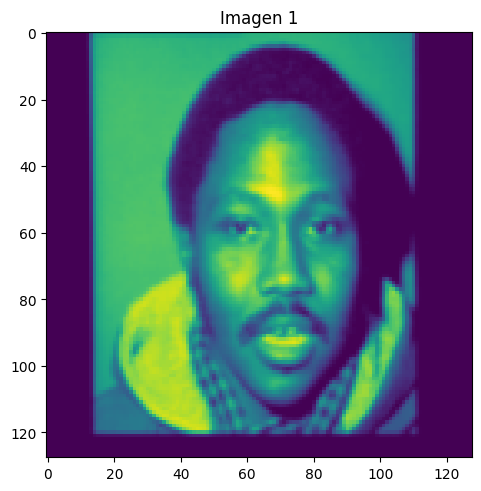

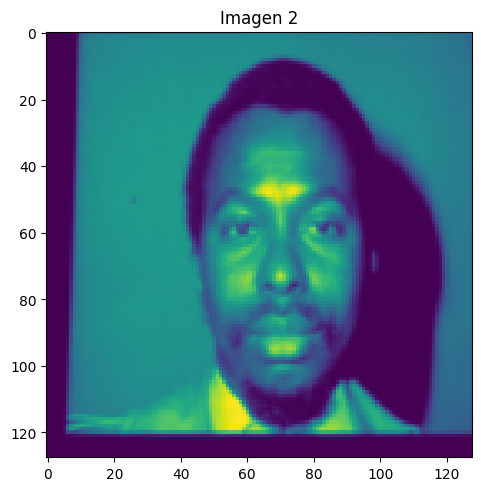

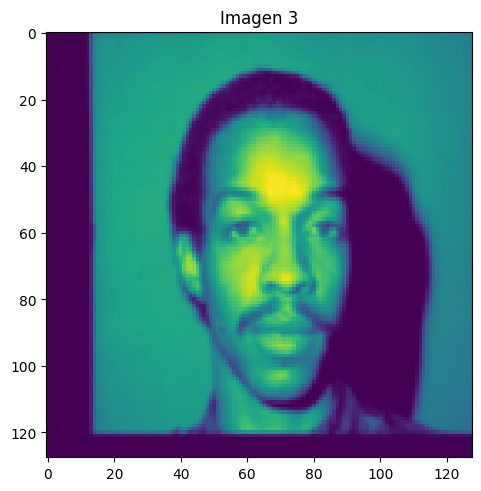

In [56]:
plot_1_images(X[int(pt5[0])], "Imagen 1")
plot_1_images(X[int(pt5[1])], "Imagen 2")
plot_1_images(X[int(pt5[2])], "Imagen 3")

In [57]:
# Como conclusión podemos ver que la mayor parte de las similitudes entre todas las imágenes de cada clúster son:
# La forma de la cara, que vemos que es uno de los parámetros que más se tienen en cuenta
# La forma y posición de la nariz
# La forma de la mandíbula
# La forma del pelo
# Todo esto de mayor a menor prioridad respectivamente
# Se pone en general ya que como podemos apreciar anteriormente son los parámetros que se tienen en cuenta en todos las imágenes dadas
